In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "C:/Users/aliaq/OneDrive/Documents/Homework/Homework19/Starter_Code/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
normalized_data = scaler.fit_transform(df_market_data)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, index=df_market_data.index, columns=df_market_data.columns)

# Print the normalized DataFrame
print(normalized_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:

inertia_values = []  # Create an empty list to store inertia values

for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

print(elbow_df)



    k_values  inertia_values
0          1    6.998354e+07
1          2    8.193204e+06
2          3    2.592707e+06
3          4    8.352274e+05
4          5    4.373295e+05
5          6    2.721565e+05
6          7    2.130576e+05
7          8    1.741889e+05
8          9    1.505684e+05
9         10    9.304067e+04
10        11    8.098188e+04


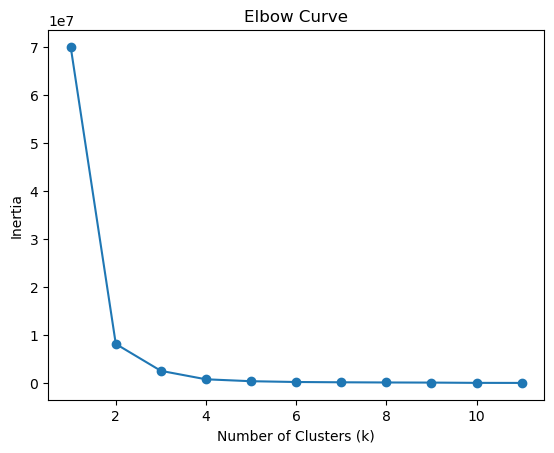

In [17]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show the plot
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [18]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace 4 with the best value for k you've identified

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k)

In [19]:

# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data)


c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_market_data)

# Print the resulting array of cluster values
print(cluster_labels)



[0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 3 3 2
 0 0 0 3]


In [22]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()


In [23]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_labels

# Display sample data
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [25]:
# Add the predicted_cluster and coin_id columns to df_copy
df_copy['predicted_cluster'] = cluster_labels
df_copy['coin_id'] = df_copy.index

# Create the scatter plot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    cmap='Category10',
    width=600,
    height=400
)

# Render the plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [26]:

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

In [30]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_components = pca.fit_transform(df_market_data)

# Convert the PCA components to a DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_copy.index)

# View the first five rows of the DataFrame
print(pca_df.head())



                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


In [31]:
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {variance:.2f}")


Explained Variance for PC1: 0.98
Explained Variance for PC2: 0.02
Explained Variance for PC3: 0.00


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [33]:
# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_copy.index)

# Display sample data
print(pca_df.head())


                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


---

### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [35]:

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)



c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


    k_values  inertia_values
0          1    6.997052e+07
1          2    8.180192e+06
2          3    2.580721e+06
3          4    8.237471e+05
4          5    4.264175e+05
5          6    2.592098e+05
6          7    2.060246e+05
7          8    1.647022e+05
8          9    1.219379e+05
9         10    8.556361e+04
10        11    7.410629e+04


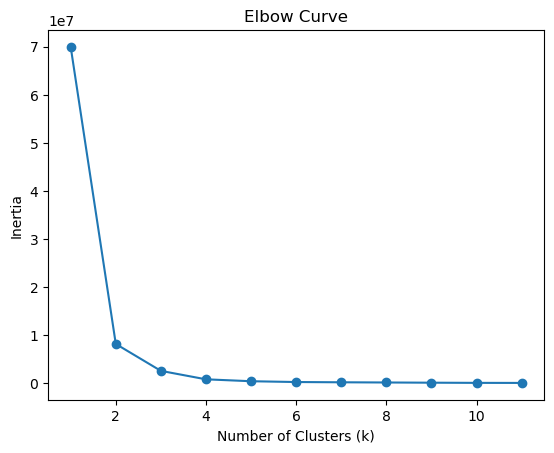

In [37]:

# Plot a line chart with all the inertia values
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show the plot
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [38]:

# Assuming best_k is the optimal value for k
best_k = 3  # Replace 3 with the optimal value for k you've identified

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k)

In [39]:

# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


c:\Users\aliaq\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [40]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans.predict(pca_df)

# Print the resulting array of cluster values
print(cluster_labels_pca)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [41]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['predicted_cluster'] = cluster_labels_pca

# Display sample data
print(pca_df_copy.head())



                     PC1         PC2        PC3  predicted_cluster
coin_id                                                           
bitcoin      -341.800963  -51.366775  12.525471                  0
ethereum     -249.420466   24.117548 -14.231466                  0
tether       -402.614721 -118.710737  24.838397                  0
ripple       -406.752437  -79.487286   1.566331                  0
bitcoin-cash -382.429948 -103.431959  16.753073                  0


In [43]:


# Add the predicted_cluster and coin_id columns to pca_df_copy
pca_df_copy['coin_id'] = pca_df_copy.index

# Create the scatter plot
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    cmap='Category10',
    width=600,
    height=400
)

# Render the plot
scatter_plot


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

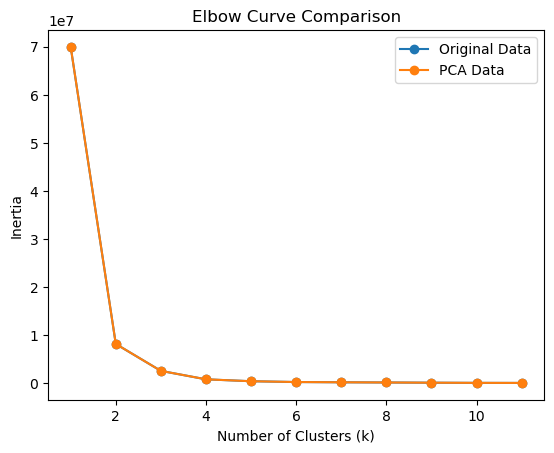

In [46]:


# Plot the Elbow curve for the original data
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], label='Original Data', marker='o', linestyle='-')

# Plot the Elbow curve for the PCA data
plt.plot(elbow_data['k_values'], elbow_data['inertia_values'], label='PCA Data', marker='o', linestyle='-')

# Add labels and title
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [51]:

# Add the predicted_cluster and coin_id columns to the original DataFrame
df_copy['predicted_cluster'] = cluster_labels
df_copy['coin_id'] = df_copy.index

# Create the scatter plot for the original data
scatter_original = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="Original Data Clusters",
    cmap='Category10',
    width=400,
    height=300
)

# Add the predicted_cluster and coin_id columns to the PCA DataFrame
pca_df_copy['coin_id'] = pca_df_copy.index

# Create the scatter plot for the PCA data
scatter_pca = pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="PCA Data Clusters",
    cmap='Category10',
    width=400,
    height=300
)

# Combine the scatter plots into a composite plot
composite_plot = scatter_original + scatter_pca

# Render the plot
composite_plot


:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 